<p style = "font-size:40px; font-family:Garamond ; font-weight : strong;    text-align: center;"> Logistic Regression </p>

  <p style = "font-size:30px; font-family:Garamond ; font-weight : normal;   text-align: center;">  Case Study - Predict potential Loan Customers </p> 


<center><img src=https://s3.ap-south-1.amazonaws.com/img1.creditmantri.com/community/article/home-loan-charges-that-every-home-loan-applicant-should-be-aware-of.jpg   width="500" height="300"></center>
<br>

# **Table of Contents**
  

- [Problem Description](#id1)
- [Importing Libraries and Data](#id2)
    * [Importing Libraries](#id2a)
    * [Importing Data](#id2b)
    * [Data Dictionary](#id2c)
- [Preprocessing Data](#id3)
    * [Basic Data Checks](#id3a)
    * [Renaming Columns](#id3b)
    * [Processing Zipcodes](#id3c)
    * [Fixing data types](#id3d)
    * [Processing Experience](#id3e)
- [Exploratory Data Analysis](#id4)
    * [EDA | 5 Point Summary ](#id4a) 
    * [Bivariate and Multivariate Analysis](#id4b) 
    * [EDA | Univariate Analysis - Continuous Variables ](#id4c)
    * [EDA | Univariate Analysis - Categorical Variables ](#id4d)
    * [EDA | Bivariate & Multivariate Analysis](#id4e)
    * [EDA | Checking Imbalance in Target Column ](#id4f)
    * [EDA | Insights Summary](#id4g)
- [Feature Engineering](#id5)
    * [Feature Engineering | Dropping Unnecessary or duplicate features](#id5a)
    * [Feature Engineering | Creating dummies](#id5b)
    * [Feature Engineering | Train Test Split ](#id5c)
    * [Feature Engineering | Feature Scaling using Standardisation ](#id5d)
- [Logistic Regression](#id6)
    * [Choosing best Performance Metric ](#id6a)
    * [Defining Functions](#id6b)
    * [Model 1 - Logistic Regression with Sklearn library ](#id6c)
    * [Model 2 - Logistic Regression with Statmodel library ](#id6d)
    * [Model 3 - Logistic Regression with Feature Selection ( P-Value based)](#id6e)
    * [Model 4 - Logistic Regression with Optimized threshold value](#id6f)
    * [Further Analysis - ROC Curve & Coefficients Inerpretations](#id6g)
- [Summary & Recommendations](#id7)

# <center>  Problem Description <font size=3 color="black" style="font-family:TimesNewRoman"> <a id='Problem_Description'></a>
    

<p1 size=3 color="black" style="font-family:TimesNewRoman">
We have data from Zenith bank that has a growing customer base. A bank has 2 types of customers :
    1. Liability Cutomers : Those who have deposits with the bank
    2. Asset Customers    : Those who have a loan with the bank
    
For Zenith bank, the majority of customers are liability customers currently (depositors). They are struggling with lower ratio of borrowers (Assets). To address this problem, they are going to run a huge camapign with a lot of Marketing Spend to increase the borrowers. This is where Machine Learning can help. The request is to provide them with a ML model that can guide them on which customers to target so that their spends are efficiently utilised. 


As a Data scientist, we have to build a model for Zenith Bank that will ease the task of marketing department by predicting most likely borrowers</p>
  
    
Main Objective of this exercise : To understand Logistic regression and explore this algorithm using Sklearn, Statmodel, and related concepts like Roc-Auc Curve, Coefficients, Feature Selection etc

**Questions to be answered-**
* Which customers will borrow a loan?
* From the given data, which features are most significant in determining above.


  

# <center>  Importing Libraries & Data  <font size=3 color="black" style="font-family:TimesNewRoman"> <a id='id2'></a>
    

### Importing Libraries <font size=3 color="black" style="font-family:TimesNewRoman"> <a id='id2a'></a>
    

In [552]:
# Importing Libraries


import numpy as np                                                        # For pre-preocessing data
import pandas as pd                                                       # For pre-preocessing data
import matplotlib.pyplot as plt                                           # For visualisation
%matplotlib inline
import seaborn as sns                                                     # For visualisation

from sklearn.linear_model import LogisticRegression                       # For training our Logistic Regression model
import scipy.stats as stats                                               # For training our model using Statsmodels
import statsmodels.api as sm                                              # For training our model using Statsmodels
from sklearn.metrics import classification_report,confusion_matrix        # For Performance metrics 
from sklearn.metrics import ConfusionMatrixDisplay                        # For plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate                        # For cross validation scores
from sklearn.model_selection import cross_val_score                       # For cross validation scores
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
                                                                          # For Performance metrics 
from statsmodels.stats.outliers_influence import variance_inflation_factor 
                                                                          # For Feature Selection
from sklearn.metrics import roc_auc_score                                 # For ROC AUC 
from sklearn.metrics import roc_curve                                     # For plotting ROC 
from sklearn.metrics import precision_recall_curve                        # For plotting Precision and Recall 

import os                                                                 # For changing home directory
from sklearn.model_selection import train_test_split                      # For train test split


pd.set_option('display.max_rows', 250)                                    # to show upto 250 rows in output
pd.set_option('display.max_colwidth',250)                                 # to show upto 250 cols in output
pd.set_option('display.float_format', lambda x: '%.5f' % x)               # customised format for pandas dataframe output


import warnings
warnings.filterwarnings('ignore')                                        # To supress warnings


plt.style.use('ggplot')                                                  # set the background for the graphs


'''
Although we have already imported all the necesssary libraries here, 
we will again import some of these in this notebook again whereever they are used just to show in which step these are used.
In a real scenario, we don't need to import again and again 
'''


"\nAlthough we have already imported all the necesssary libraries here, \nwe will again import some of these in this notebook again whereever they are used just to show in which step these are used.\nIn a real scenario, we don't need to import again and again \n"

### Importing Data <font size=3 color="black" style="font-family:TimesNewRoman"> <a id='id2b'></a>
    

In [553]:
# Changing working directory to where our csv data file is 

import os 

print('Current working directory is ----    '+ os.getcwd())
os.chdir("D:\\Relevel\\Week14_Day4\\Data")
print('Changed working directory is ----    '+ os.getcwd())


Current working directory is ----    D:\Relevel\Week14_Day4\Data
Changed working directory is ----    D:\Relevel\Week14_Day4\Data


In [554]:
# imporitng data to a pandas dataframe
file_path='D:\\Relevel\\Week14_Day4\\Data\\zenith_bank_customer_loans.csv'

original_data=pd.read_csv(file_path)
customers_data=original_data.copy()
print(f'We have {customers_data.shape[0]} rows and {customers_data.shape[1]} columns in the data') # fstring 

We have 5000 rows and 14 columns in the data


In [555]:
customers_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [556]:
customers_data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80000,1,0,0,0,0,1,1


### Data Dictionary <font size=3 color="black" style="font-family:TimesNewRoman"> <a id='id2c'></a>
    


    
* ID: Unique ID of Customer
* Age: Age of the Customer
* Experience: Years of experience
* Income: Annual income `(in $1000)`
* ZIP Code: ZIP code of residence
* Family: Count of family members
* CCAvg: Avg Monthly Spending on Credit Card `(in $1000)`
* Education: 1- Undergrad; 2- Graduate;3- Advanced/Professional
* Mortgage: House Mortgage (in $1000)
* Personal_Loan: Flag indicating whether customer opted for loan previously or not ( 1 - Opted for loan)
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Flag indicating whether the customer has a certificate of deposit (CD) account with the bank
* Online: Flag indicating whether the customer use internet banking facilities
* CreditCard: Flag indicating whether the customer use a credit card issued by any other Bank (excluding Zenith Bank)?
   

##### Glancing at the basic characteristics of our data

In [557]:
print ("Rows     : " , customers_data.shape[0])  #shows count of rows
print ("Columns  : " , customers_data.shape[1])  #shows count of cols
print ("#"*55,"\n","Features : \n\n", customers_data.columns.tolist())  # lists down all the features 

Rows     :  5000
Columns  :  14
####################################################### 
 Features : 

 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


# <center>  Preprocessing Data <font size=3 color="black" style="font-family:TimesNewRoman"> <a id='id3'></a>
    

### Basic Data Checks <a id='id2d'></a>

##### Checking for missing values 

In [558]:

print ("Missing values :\n\n", customers_data.isnull().sum().sort_values(ascending=False))  


Missing values :

 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


#####  Number of unique values in each column

It can help us in determining categorical/continuous features

In [559]:
# Finding out number of unique values in each column. 
print ("\nUnique values :")
customers_data.nunique()


Unique values :


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

##### Checking data types and count of non-null entries for each column

In [560]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observation-**
There are no missing values in the dataset.  All the columns are numerical here. `Personal loan` is target variable.  Zipcode,Family,Education,Securities Account,CD_account,online,Credit card are all categorical variables.

Let's check how our data looks like again to see if there are any irrelevant columns from EDA & ML perspective - 

In [561]:
customers_data.sample(15)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
394,395,33,9,80,91311,4,3.40000,1,0,0,0,0,1,1
4978,4979,57,27,63,90210,4,2.00000,3,0,0,0,0,1,0
1050,1051,53,27,145,90095,2,6.10000,3,294,1,0,1,1,1
3785,3786,54,28,83,95841,1,2.40000,1,0,0,0,0,1,0
4398,4399,63,37,61,91942,1,2.50000,3,0,0,0,0,0,0
1546,1547,33,9,105,95136,1,4.00000,1,0,0,0,0,1,0
2673,2674,54,30,88,92647,4,1.00000,2,122,0,0,0,1,0
1496,1497,36,12,18,91330,1,0.50000,3,0,0,0,0,0,1
1242,1243,29,4,44,91380,4,2.00000,2,0,0,0,0,1,0
1264,1265,58,33,138,94546,2,3.90000,1,0,0,0,0,1,0


**Observaion  --**

`Id` column is not useful for EDA/ML modelling, hence can be dropped.**


In [562]:
# Dropping ID
customers_data.drop(['ID'],axis=1,inplace=True)

### Renaming Columns <a id='id3b'></a>

It is always better to not have any spaces in between columns
It allows for more flexibility in some functions and operations 
For example, statsmodel syntax doesnt allow feature names to have spaces in betweenm

In [563]:
customers_data.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan",
                               "Securities Account":"SecuritiesAccount",
                               "CD Account":'CDAccount'},inplace=True)

### Processing Zipcode <a id='id3c'></a>

We also have Zipcodes as a feature in our data. We can leverage zipcodes library in Python to map Zipcodes to counties. It will provide us a better insight rather than using Zipcodes directly.

Improving our data with any means possible is one of the key steps in a ML project. The goal is to maximize the efficiency of data information we have. 

In [564]:
# Checking number of unique zipcodes again
customers_data.ZIPCode.nunique()

467

In [565]:
# Installing zipcodes library to map Zipcodes to corresponding counties 
!pip install zipcodes 


In [566]:
# Making a list of unique Zipcodes, which will be used to map to counties in next step
zipcodes =customers_data.ZIPCode.unique()

zipcodes[0:5]

array([91107, 90089, 94720, 94112, 91330], dtype=int64)

In [567]:
# Mapping Zipcodes to Counties
import zipcodes as zcode


zip_dict={}
for zipcode in zipcodes:
    city_county = zcode.matching(zipcode.astype('str'))
    
    # If Zipcode exits, map county
    if len(city_county)==1: 
        county=city_county[0].get('county')
        
    # Otherwise assign Zipcode only as County
    else:
        county=zipcode
    
    zip_dict.update({zipcode:county})
      

In [568]:
# Checking our mapping
zip_dict

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

Our mapping was able to find counties for all zipcodes except -  `96651,92634,93077,92717`.
We can fix some of these by looking up on the internet as below - 

In [569]:
zip_dict.update({92717:'Orange County'})
zip_dict.update({92634:'Orange County'})


Now that we have mapped Zipcodes to counties, we can add Counties as new feature to our data set

In [570]:
customers_data['County']=customers_data['ZIPCode'].map(zip_dict)

In [571]:
# Checking number of unique Counties
customers_data.County.nunique()

40

Checking the features in our new dataframe after counties addition, just to verify- 

In [572]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   ZIPCode            5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   CCAvg              5000 non-null   float64
 6   Education          5000 non-null   int64  
 7   Mortgage           5000 non-null   int64  
 8   PersonalLoan       5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  Online             5000 non-null   int64  
 12  CreditCard         5000 non-null   int64  
 13  County             5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


### Fixing the data types <a id='id3d'></a>

Int datatype takes more space that category data type.
Some of the Categorical features are stored as Int type, it will be efficient to store those as Categories instead.

In [573]:
customers_data.describe()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
count,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000
mean,45.33840,20.10460,73.77420,93152.50300,2.39640,1.93794,1.88100,56.49880,0.09600,0.10440,0.06040,0.59680,0.29400
std,11.46317,11.46795,46.03373,2121.85220,1.14766,1.74766,0.83987,101.71380,0.29462,0.30581,0.23825,0.49059,0.45564
min,23.00000,-3.00000,8.00000,9307.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,35.00000,10.00000,39.00000,91911.00000,1.00000,0.70000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,45.00000,20.00000,64.00000,93437.00000,2.00000,1.50000,2.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
75%,55.00000,30.00000,98.00000,94608.00000,3.00000,2.50000,3.00000,101.00000,0.00000,0.00000,0.00000,1.00000,1.00000
max,67.00000,43.00000,224.00000,96651.00000,4.00000,10.00000,3.00000,635.00000,1.00000,1.00000,1.00000,1.00000,1.00000


**Observations -**
* Few of the Categorical features are stored as Int type (Which is not memory efficient)
* Experience is -ve ( which seems incorrect). Let's fix that later.

##### Int to Category Conversion

In [574]:
cat_features = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 'CreditCard', 'ZIPCode', 'Education','County']
customers_data[cat_features] = customers_data[cat_features].astype('category')

In [575]:
# Verifying the changed data types
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   ZIPCode            5000 non-null   category
 4   Family             5000 non-null   category
 5   CCAvg              5000 non-null   float64 
 6   Education          5000 non-null   category
 7   Mortgage           5000 non-null   int64   
 8   PersonalLoan       5000 non-null   category
 9   SecuritiesAccount  5000 non-null   category
 10  CDAccount          5000 non-null   category
 11  Online             5000 non-null   category
 12  CreditCard         5000 non-null   category
 13  County             5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 266.4 KB


 **Memory usage has reduced from `547 to 266.4`**

###  Processing Experience <a id='id3e'></a>


As seen before, we have -ve Experience values in the data. Let's explore more on that -

1. Checking the total count of such values
2. Checking in what age range these lie

In [576]:
# Exploring more on -ve experience values

customers_data[customers_data['Experience']<0]['Age'].describe()

count   52.00000
mean    24.51923
std      1.47516
min     23.00000
25%     24.00000
50%     24.00000
75%     25.00000
max     29.00000
Name: Age, dtype: float64

There are 52 instances of -ve experience.
These lie between 23-29 Age range

In [577]:
customers_data.groupby(['Age','Education'])['Experience'].describe().T

Age             23                24                         25           \
Education        1        2        1        2        3        1        2   
count      7.00000  5.00000 13.00000  8.00000  7.00000 23.00000 11.00000   
mean      -1.28571 -2.20000 -0.69231 -0.87500 -2.00000  0.52174 -0.27273   
std        0.75593  0.44721  0.94733  0.64087  1.00000  0.79026  0.64667   
min       -3.00000 -3.00000 -2.00000 -2.00000 -3.00000 -1.00000 -1.00000   
25%       -1.00000 -2.00000 -2.00000 -1.00000 -2.50000  0.00000 -1.00000   
50%       -1.00000 -2.00000  0.00000 -1.00000 -2.00000  1.00000  0.00000   
75%       -1.00000 -2.00000  0.00000 -0.75000 -2.00000  1.00000  0.00000   
max       -1.00000 -2.00000  0.00000  0.00000  0.00000  1.00000  1.00000   

Age                      26           ...       64       65                    \
Education        3        1        2  ...        3        1        2        3   
count     19.00000 30.00000 24.00000  ... 30.00000 30.00000 23.00000 27.00000   
mean      -0.52632  1.43333  0.75000  ... 38.53333 39.86667 40.08696 39.51852   
std        0.69669  0.81720  0.84699  ...  1.75643  0.73030  0.73318  1.55342   
min       -2.00000  0.00000 -1.00000  ... 34.00000 39.00000 39.00000 35.00000   
25%       -1.00000  1.00000  0.00000  ... 38.00000 39.00000 40.00000 39.00000   
50%       -1.00000  2.00000  1.00000  ... 39.00000 40.00000 40.00000 40.00000   
75%        0.00000  2.00000  1.00000  ... 40.00000 40.00000 41.00000 41.00000   
max        1.00000  2.00000  2.00000  ... 40.00000 41.00000 41.00000 41.00000   

Age             66                         67                    
Education        1        2        3        1        2        3  
count      9.00000  5.00000 10.00000  5.00000  3.00000  4.00000  
mean      41.11111 41.40000 40.40000 41.60000 42.66667 41.50000  
std        0.33333  0.54772  1.64655  0.89443  0.57735  0.57735  
min       41.00000 41.00000 36.00000 41.00000 42.00000 41.00000  
25%       41.00000 41.00000 40.25000 41.00000 42.50000 41.00000  
50%       41.00000 41.00000 41.00000 41.00000 43.00000 41.50000  
75%       41.00000 42.00000 41.00000 42.00000 43.00000 42.00000  
max       42.00000 42.00000 42.00000 43.00000 43.00000 42.00000  

[8 rows x 134 columns]

**As per education & age it is evident that values are negative by mistake. Hence, converting these into Absolute values**

In [578]:
customers_data.loc[customers_data['Experience']<0,'Experience']=np.abs(customers_data['Experience'])

# <center>  Exploratory Data Analysis <font size=3 color="black" style="font-family:TimesNewRoman"> <a id='id4'></a>
    

###  EDA | 5 Point Summary <a id='id4a'></a>


<font size=2 color="blue" style="font-family:TimesNewRoman">

In [579]:
customers_data.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000
mean,45.33840,20.13460,73.77420,1.93794,56.49880
std,11.46317,11.41519,46.03373,1.74766,101.71380
min,23.00000,0.00000,8.00000,0.00000,0.00000
25%,35.00000,10.00000,39.00000,0.70000,0.00000
50%,45.00000,20.00000,64.00000,1.50000,0.00000
75%,55.00000,30.00000,98.00000,2.50000,101.00000
max,67.00000,43.00000,224.00000,10.00000,635.00000


* The experience seems to be fine now, as minimum experience value is 0
* Age ranges from 23-67, looks fine. Mean age of applicants is 45
* Income ranges from 8 grand to 224 grand, with mean at 73
* CCAvg seems to be a in between 0-10 grand, with average customer spending at $1.93k
* Mortgage range is 0-635 grand. Mean is around 56

    

###  EDA | Value counts for Categorical columns <a id='id4b'></a>


In [580]:
for column in cat_features:
    print(customers_data[column].value_counts())
    print("*" * 55)


0    4520
1     480
Name: PersonalLoan, dtype: int64
*******************************************************
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
*******************************************************
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
*******************************************************
0    4698
1     302
Name: CDAccount, dtype: int64
*******************************************************
1    2984
0    2016
Name: Online, dtype: int64
*******************************************************
0    3530
1    1470
Name: CreditCard, dtype: int64
*******************************************************
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
90813      1
94404      1
90068      1
9307       1
Name: ZIPCode, Length: 467, dtype: int64
*******************************************************
1    2096
3    1501
2    1403
Name: Education, dtype: int64
**************************************

**Insights**

- Maximum `1095` customers belong to `Los Angeles County`.
- Only about 110% customer ( `480` ) had borrowed loan previously.


###  EDA | Univariate Analysis - Continuous Variables <a id='id4c'></a>


Below function plots a  graph for univariate analysis of all continuous features 
Distribution, central tendency and outliers can be analysed 

In [581]:
def univariate(data_univariate):

    Name=data_univariate.name
    fig,(ax_boxplot,ax_distplot)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(10, 5))
    

    sns.set_theme(style="white")                                           # set background as white for clean plot
    fig.suptitle("Univariate Plots : "+ Name  , fontsize=15, fontweight='bold')
    sns.boxplot(x=data_univariate,showmeans=True, orient='h',color="violet",ax=ax_boxplot)  # Plot boxplot
    ax_boxplot.set(xlabel='')         
    sns.despine(top=True,right=True,left=True)                                      # this removes side borders
    sns.distplot(data_univariate,kde=False,color='blue',ax=ax_distplot)            # plot distplot
    
    mean=data_univariate.mean()
    median=data_univariate.median()
    mode=data_univariate.mode().tolist()[0]
    ax_distplot.axvline(mean, color='r', linestyle='--',linewidth=2)              # plot mean line
    ax_distplot.axvline(median, color='g', linestyle='-',linewidth=2)               # plot median line
    ax_distplot.axvline(mode, color='y', linestyle='-',linewidth=2)               # plot mode line
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                    

Iterating the function over all Continuous features, to plot the Univariate graphs - 

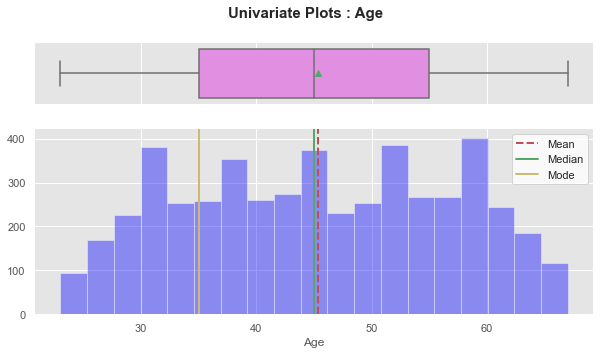

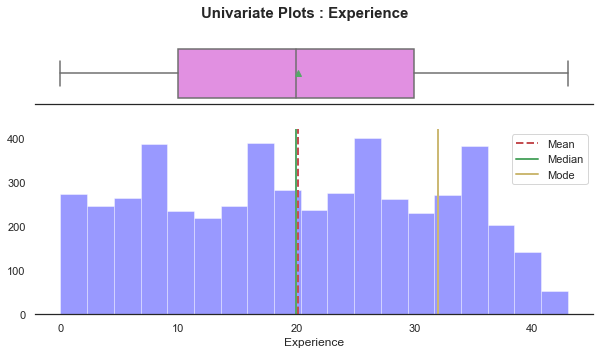

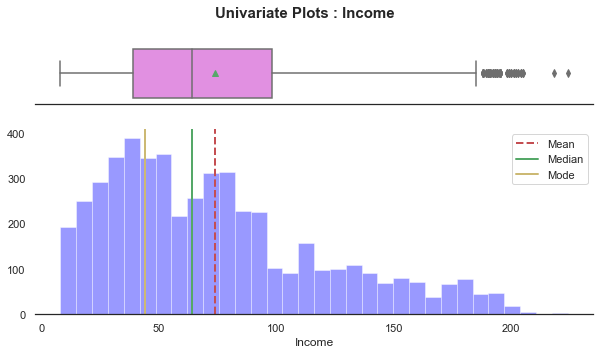

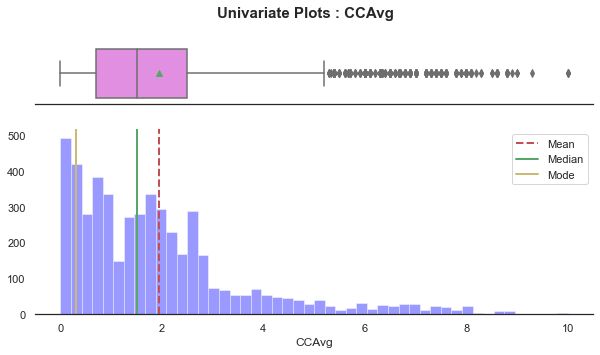

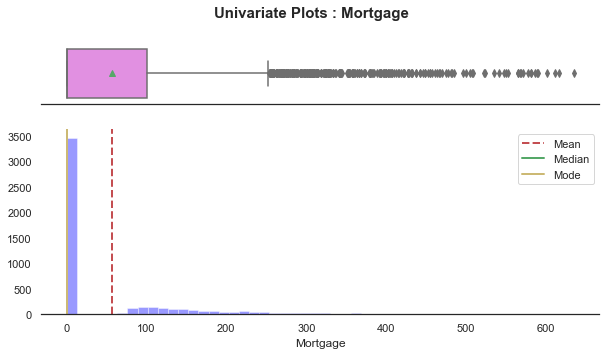

In [582]:
num_f =  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(num_f)):
    univariate(customers_data[num_f[i]])

**Observations**
- Age and experience have similar distribution
- Income,Mortgage & CCAvg all are both Right skewed.
- Mortgage is  0 for a lot of customers

###  EDA | Univariate Analysis - Categorical Variables <a id='id4d'></a>


Before we proceed with this analysis, it it better to readjust some of the cateogrical features into specific bins or segments for better analysis. This is done as below - 

##### Converting Age into Bins

It is always a good plan to convert age into bins and see the pattern.
These bins can also be generation specific when applcable ( Millenials, baby boomers etc.), but here we'll just go with numerical bins.

In [495]:
customers_data['Age_bins'] = pd.cut(customers_data['Age'], bins = [0, 30, 40, 50, 60, 100], 
                                  labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

##### Converting Income into Bins

Similarly, deirving Customer Segment based on Income

In [496]:
# Create a new variable - Income group

customers_data["Income_segment"] = pd.cut(
    x=original_data["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)


##### Converting Spending into Bins

Deriving Customer Segment based on Spending

In order to find the best boundaries for low/mid/high segment, lets look at the CCAvg 5 poin summary first -

In [497]:
customers_data.CCAvg.describe()

count   5000.00000
mean       1.93794
std        1.74766
min        0.00000
25%        0.70000
50%        1.50000
75%        2.50000
max       10.00000
Name: CCAvg, dtype: float64

0.7 and 2.5 seem ike good boundary points

In [498]:
customers_data["Spending_segment"] = pd.cut( x=customers_data["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
                                            labels=["Low", "Medium", "High"],include_lowest=True )


#### Univariate Analysis -  Categorical Variables ( Using Countplot )

##### ( We'll analyse counties seperately as they are a lot in number )

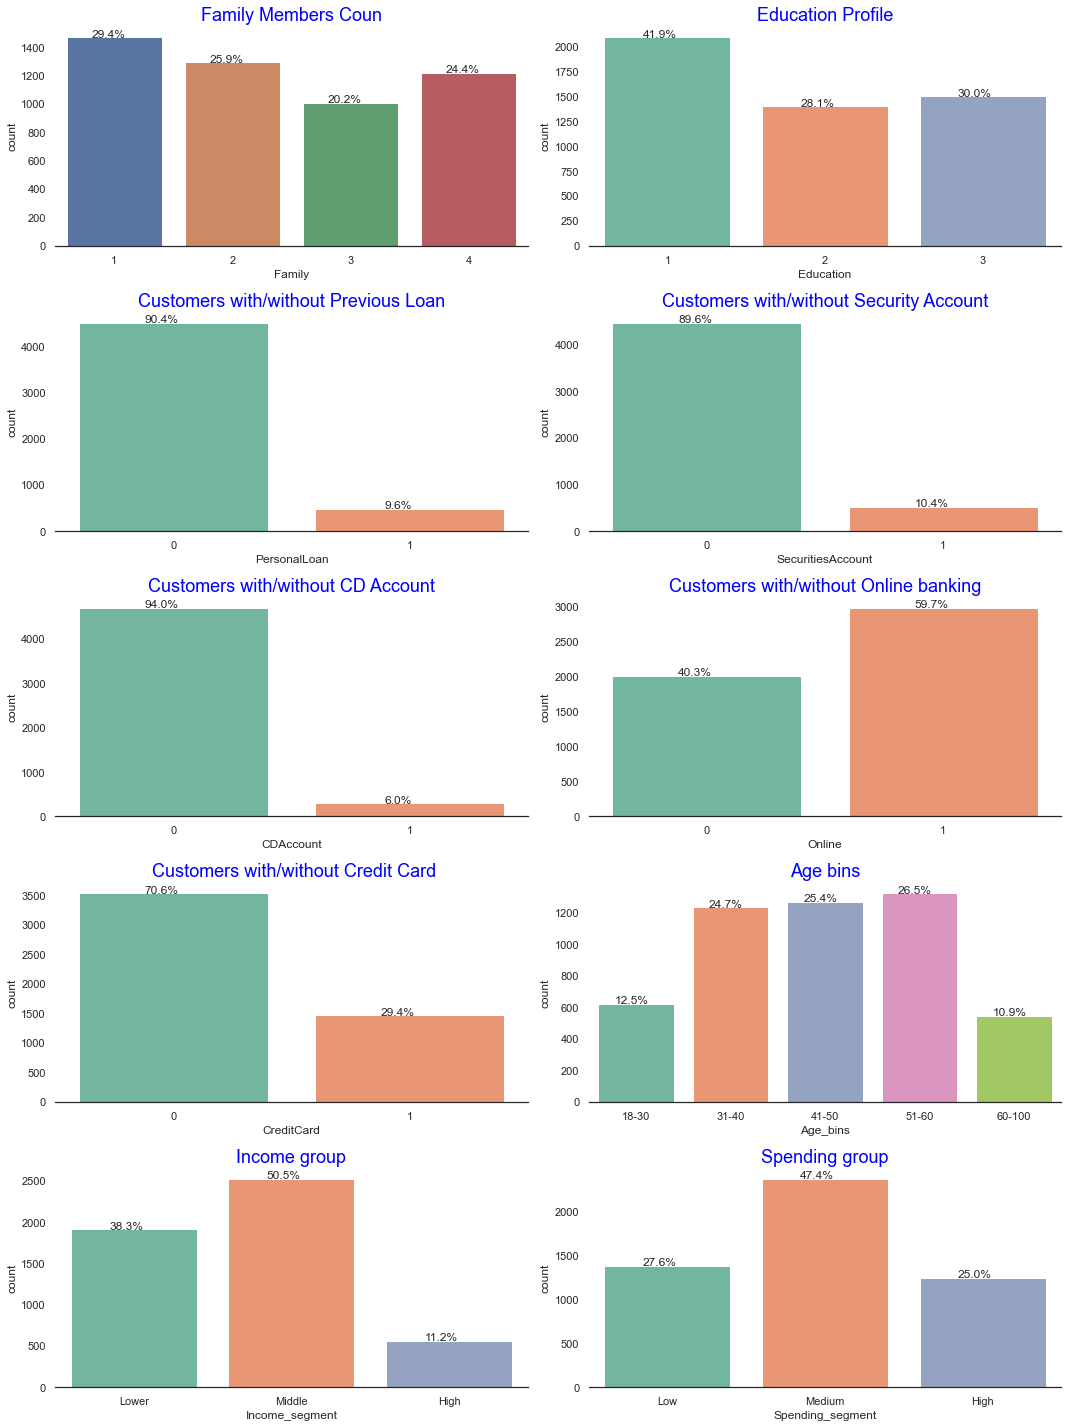

In [499]:

cat_cols = ['Family','Education','PersonalLoan','SecuritiesAccount',
               'CDAccount','Online','CreditCard',
               'Age_bins','Income_segment','Spending_segment']     # list of all categorical features
titles=['Family Members Coun','Education Profile','Customers with/without Previous Loan',
       'Customers with/without Security Account','Customers with/without CD Account',
       'Customers with/without Online banking',' Customers with/without Credit Card',
       'Age bins',"Income group",'Spending group']                 # List of plot titles for better understanding of plot
plt.figure(figsize=(15,20))

sns.set_theme(style="white")                                       # white background

for i, variable in enumerate(cat_cols):
                     plt.subplot(5,2,i+1)                          # Adjusting logic for subplots  

                     ax=sns.countplot(x=customers_data[variable], data=customers_data ) # plot countplot
                
                     sns.set_palette('Set2')                       # setting theme
                     sns.despine(top=True,right=True,left=True)    # remove unnecessary boundaries
                        
                     for p in ax.patches:                          # using matplotlib axes object to show %s
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(customers_data[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                        
                     plt.tight_layout()
                     plt.title(titles[i],size = 18, color = 'blue')
                                     


**Insights**

- Almost 1/3rd customers are single.
- ~40% customers are undergraduates.
- Just ~10% have a previous loan with the bank
- ~10% customers have a securities account 
- A mere 5% customer have a CD account.
- More customers  transact online (60%).
- Almost 1/3rd customers have  credit cards.  
- 3/4th of customers  are in range of 31- 60.
- Half of the customers belong to middle income group.
- Half of the customers has medium Average spending.

##### Univariate Analysis - Counties

Checking Count of customers by Counties for each of Target label ( 0 & 1 )

In [500]:
customers_data.groupby(['County','PersonalLoan'])['PersonalLoan'].agg({'size'}).unstack()

size     
PersonalLoan              0    1
County                          
9307                      1    0
96651                     6    0
Alameda County          456   44
Butte County             17    2
Contra Costa County      73   12
El Dorado County         16    1
Fresno County            24    2
Humboldt County          30    2
Imperial County           3    0
Kern County              47    7
Lake County               4    0
Los Angeles County      984  111
Marin County             48    6
Mendocino County          7    1
Merced County             4    0
Monterey County         113   15
Napa County               3    0
Orange County           333   33
Placer County            22    2
Riverside County         50    6
Sacramento County       169   15
San Benito County        14    0
San Bernardino County    98    3
San Diego County        509   59
San Francisco County    238   19
San Joaquin County       12    1
San Luis Obispo County   28    5
San Mateo County        192   12
Santa Barbara County    143   11
Santa Clara County      492   71
Santa Cruz County        60    8
Shasta County            15    3
Siskiyou County           7    0
Solano County            30    3
Sonoma County            22    6
Stanislaus County        14    1
Trinity County            4    0
Tuolumne County           7    0
Ventura County          103   11
Yolo County             122    8

<AxesSubplot:ylabel='County'>

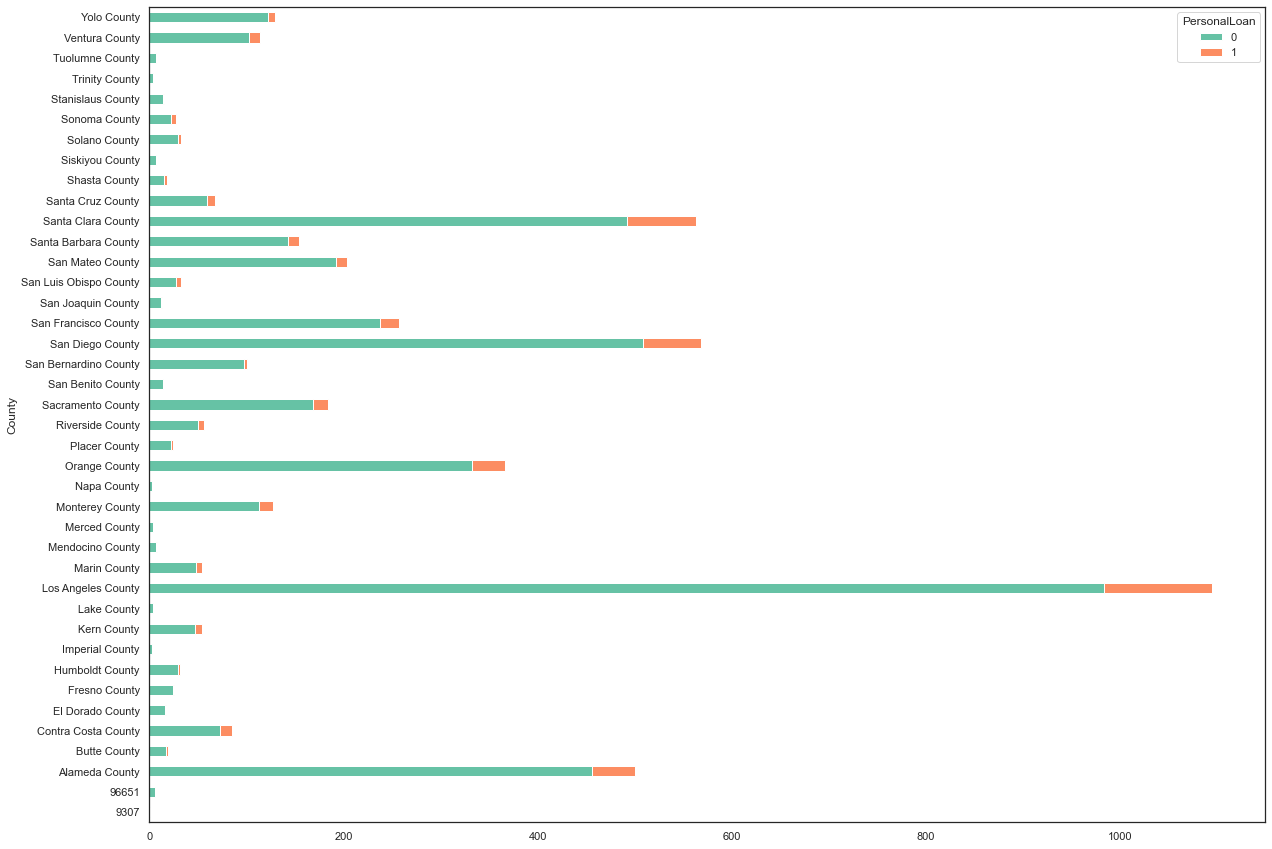

In [501]:
# Plotting the above data via Crosstab

pd.crosstab(index=customers_data['County'],columns=customers_data['PersonalLoan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(20,15))

**Counties seem to be an important feature since loans vary a lot by counties 
But counties are a lot in number and this level is too granular to analyse.
Hene we can map these to regions using information from Internet**

Source used for below step - 
https://www.calbhbc.org/region-map-and-listing.html

In [502]:
counties_region_mapping = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}

Mapping the Counties to Regions and adding to main dataframe

In [503]:
customers_data['Regions'] = customers_data['County'].map(counties_region_mapping)

Checking Unique regions ( Should be 4-5 values only )

In [504]:
customers_data['Regions'].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central', nan], dtype=object)

Verifying if any row is left out from mapping ? ---

In [505]:
customers_data.isnull().sum()

Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
County               0
Age_bins             0
Income_segment       0
Spending_segment     0
Regions              1
dtype: int64

We can see tere is one row for which region could not be mapped.
Lets drop that row, as that is not going to affect our EDA/model at all.

In [506]:
customers_data.dropna(inplace=True)

##### Univariate Analysis - Region

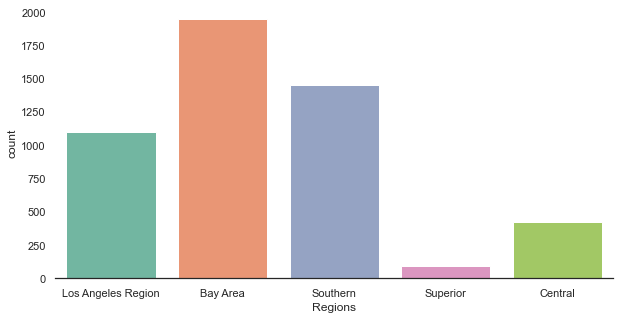

In [507]:
plt.figure(figsize=(10,5))
sns.countplot(data=customers_data,x=customers_data['Regions'])
sns.despine(top=True,right=True,left=True) 

**Insights -** 
* Bay Area has maximum customers followed by Southern regions
* Superior region have very few customers

###  EDA | Bivariate & Multivariate Analysis <a id='id4e'></a>


##### Bivariate Analysis - Heatmap

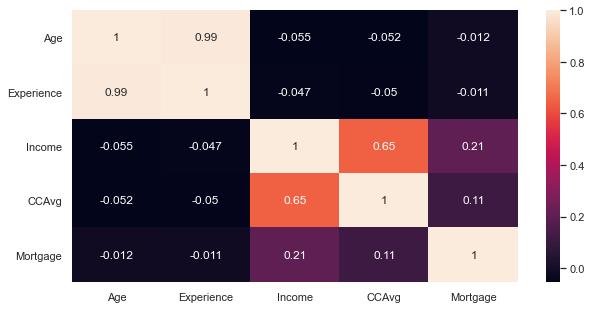

In [508]:
sns.set_palette(sns.color_palette("Set2", 10))
plt.figure(figsize=(10,5))
sns.heatmap(customers_data.corr(),annot=True)
plt.show()

##### Bivariate Analysis - Pairplot

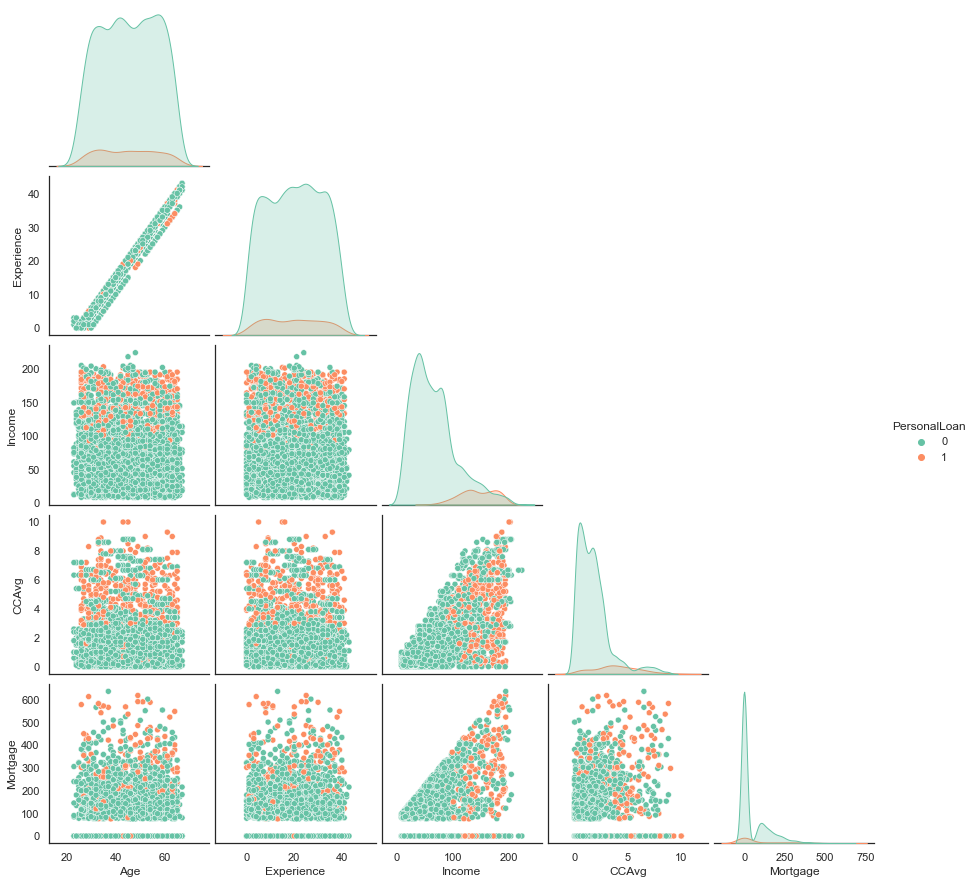

In [509]:
sns.set_palette(sns.color_palette("Set2", 10))
sns.pairplot(customers_data, hue="PersonalLoan",corner=True)
plt.show()

**Heatmap & Pairplot Insights-**
- Age & experience seem to be highly correlated.
- Income & Average spending  are  positively corrleated.
- Counter-intiutively, Mortgage has very little correlation with income.
- Higher Income & Higher spending seem to be consisting of a lot of potential loan buyers.


##### Bivariate Analysis - Boxplot comparison of Numerical Feature(s) vs Target

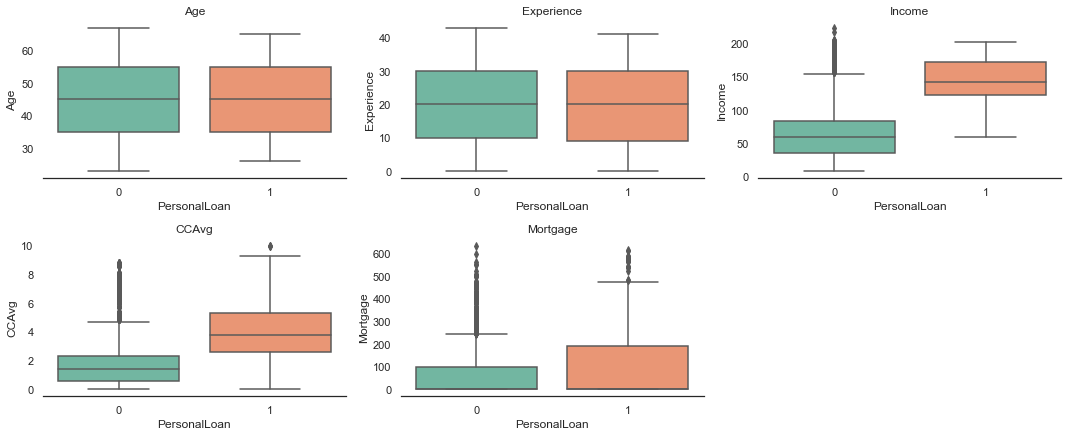

In [510]:
num_cols = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,30))

sns.set_palette(sns.color_palette("Set2", 10))
for i, variable in enumerate(num_cols):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='PersonalLoan',y= customers_data[variable], data=customers_data)     
        sns.despine(top=True,right=True,left=True) 
        plt.tight_layout()
        plt.title(variable)

**Insights-**
* Age & Experience don't seem to impact our target variable
* Target observes Higher Income and Higher Spend 
* People with loans have slighty wider Mortgage distribution, but overall impact is not significant

Let's confirm above insights via plotting distributions for both features - 

##### Bivariate Analysis - Displot comparison of CCAvg vs Target

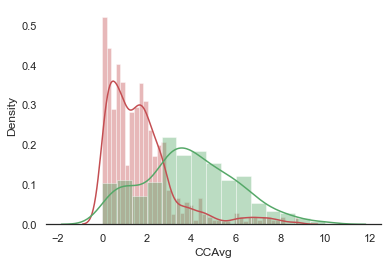

In [511]:
sns.distplot( customers_data[customers_data['PersonalLoan'] == 0]['CCAvg'], color = 'r')
sns.distplot( customers_data[customers_data['PersonalLoan'] == 1]['CCAvg'], color = 'g')
sns.despine(top=True,right=True,left=True)

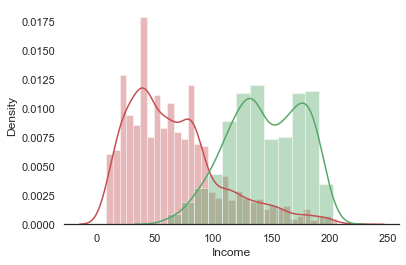

In [512]:
sns.distplot( customers_data[customers_data['PersonalLoan'] == 0]['Income'], color = 'r')
sns.distplot( customers_data[customers_data['PersonalLoan'] == 1]['Income'], color = 'g')
sns.despine(top=True,right=True,left=True) 

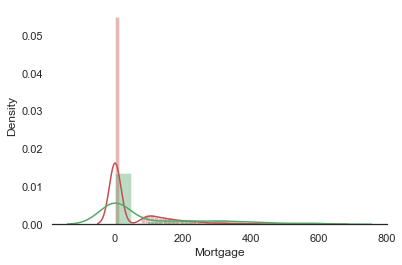

In [513]:
sns.distplot( customers_data[customers_data['PersonalLoan'] == 0]['Mortgage'], color = 'r')
sns.distplot( customers_data[customers_data['PersonalLoan'] == 1]['Mortgage'], color = 'g')
sns.despine(top=True,right=True,left=True) 

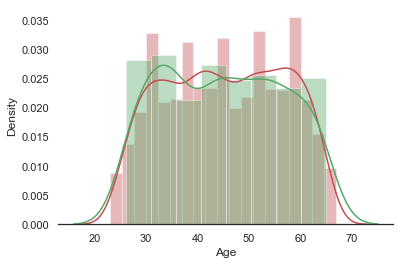

In [514]:
sns.distplot( customers_data[customers_data['PersonalLoan'] == 0]['Age'], color = 'r')
sns.distplot( customers_data[customers_data['PersonalLoan'] == 1]['Age'], color = 'g')
sns.despine(top=True,right=True,left=True) 

**Displot Comparison Insights-**
* Hence our hypotheses seem to be true. The distribution of "1" is left skewed for Income & Average Spend features.

##### Bivariate Analysis | Stacked Bars - Categorical Feature(s) vs Target 

In [515]:
# Defining function to plot Stacked bar of Categorical Feature vs Target ( 0 & 1)

def stacked_bar_plot(x):
    
    # Displaying data
    sns.set_palette(sns.color_palette("Set2", 10))                     # Color theme
    tab1 = pd.crosstab(x,customers_data['PersonalLoan'],margins=True)  # Calculate count of 0s and 1s in Target for a feature
    print('************************************************')
    print('Feature : ' + str(variable))                                # To display Feature
    print(tab1)                                                        # To display crosstab data related to Feature and Target
    print('-'*120)                                                     # Seperating line
    
    # Plotting Stack Bar
    tab = pd.crosstab(x,customers_data['PersonalLoan'],normalize='index') # Again calculating crosstab data for plot, 
                                                                          #this time normalising it over rows 
    tab.plot(kind='bar',stacked=True,figsize=(7,5))
    plt.xticks(rotation=355)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Borrower ?",bbox_to_anchor=(1,1))
    
    
    sns.despine(top=True,right=True,left=True)
    plt.show()

************************************************
Feature : Family
PersonalLoan     0    1   All
Family                       
1             1365  107  1472
2             1190  106  1296
3              877  133  1010
4             1087  134  1221
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


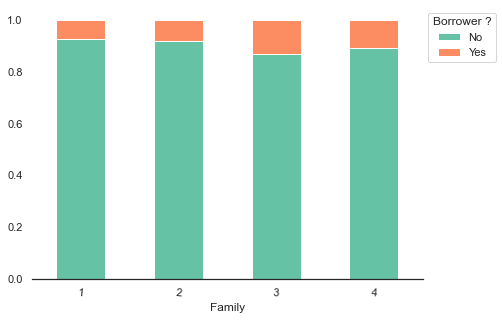

************************************************
Feature : Education
PersonalLoan     0    1   All
Education                    
1             2003   93  2096
2             1221  182  1403
3             1295  205  1500
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


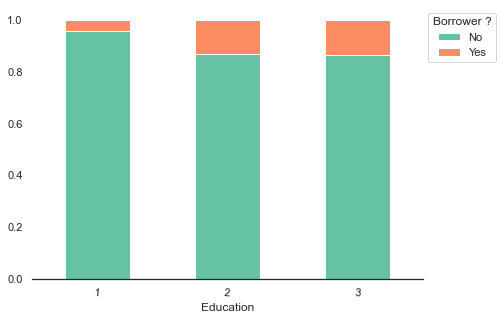

************************************************
Feature : SecuritiesAccount
PersonalLoan          0    1   All
SecuritiesAccount                 
0                  4057  420  4477
1                   462   60   522
All                4519  480  4999
------------------------------------------------------------------------------------------------------------------------


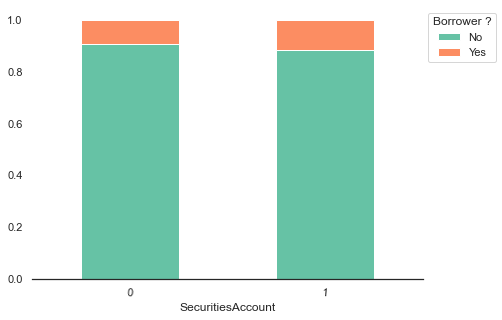

************************************************
Feature : CDAccount
PersonalLoan     0    1   All
CDAccount                    
0             4357  340  4697
1              162  140   302
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


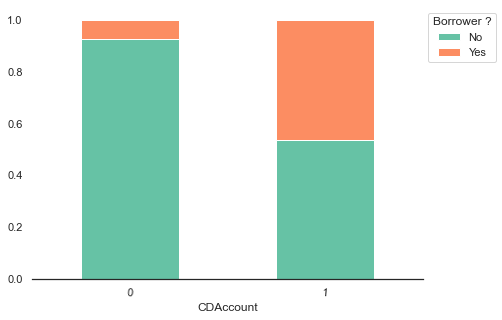

************************************************
Feature : CreditCard
PersonalLoan     0    1   All
CreditCard                   
0             3193  337  3530
1             1326  143  1469
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


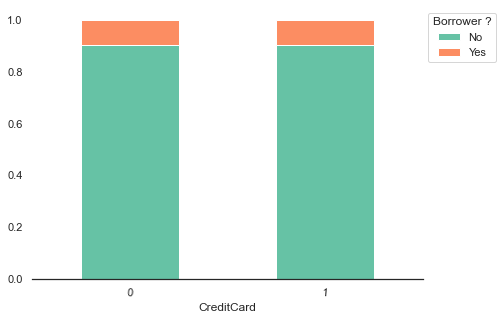

************************************************
Feature : Online
PersonalLoan     0    1   All
Online                       
0             1827  189  2016
1             2692  291  2983
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


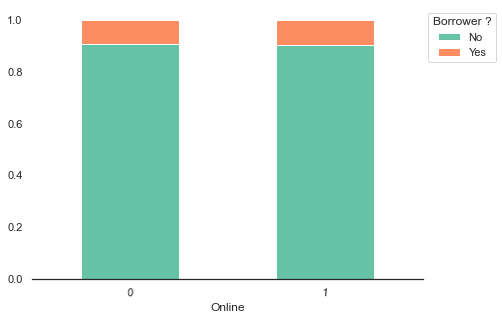

************************************************
Feature : Regions
PersonalLoan           0    1   All
Regions                            
Bay Area            1747  196  1943
Central              390   30   420
Los Angeles Region   984  111  1095
Southern            1314  135  1449
Superior              84    8    92
All                 4519  480  4999
------------------------------------------------------------------------------------------------------------------------


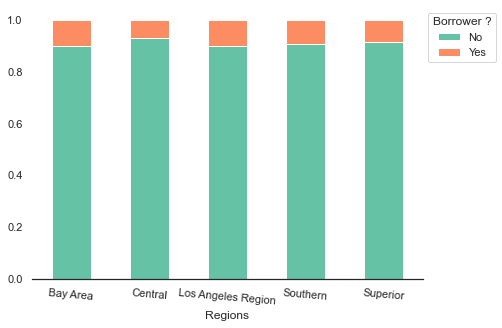

************************************************
Feature : Age_bins
PersonalLoan     0    1   All
Age_bins                     
18-30          558   66   624
31-40         1118  118  1236
41-50         1148  122  1270
51-60         1207  115  1322
60-100         488   59   547
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


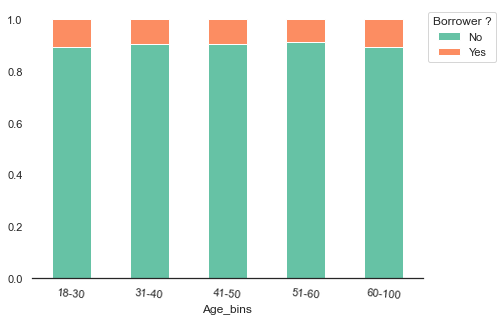

************************************************
Feature : Income_segment
PersonalLoan       0    1   All
Income_segment                 
Lower           1913    0  1913
Middle          2301  223  2524
High             305  257   562
All             4519  480  4999
------------------------------------------------------------------------------------------------------------------------


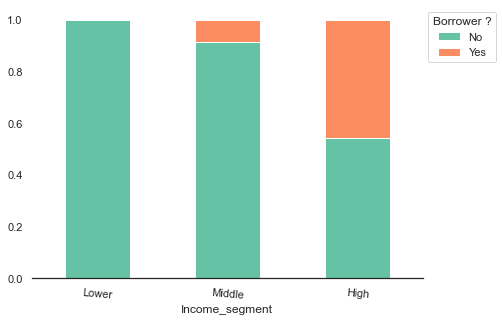

************************************************
Feature : Spending_segment
PersonalLoan         0    1   All
Spending_segment                 
Low               1341   39  1380
Medium            2292   79  2371
High               886  362  1248
All               4519  480  4999
------------------------------------------------------------------------------------------------------------------------


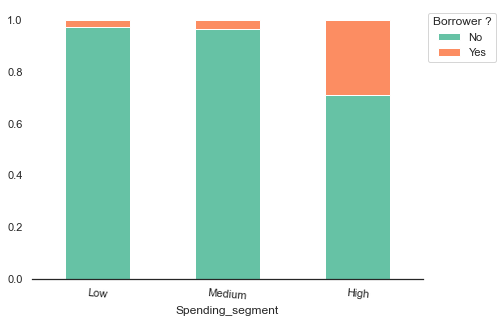

In [516]:
# Ploting it by calling the above function for all catgorical features
cat_cols=['Family','Education','SecuritiesAccount','CDAccount','CreditCard','Online','Regions','Age_bins',
             'Income_segment','Spending_segment']
for i, variable in enumerate(cat_cols):
       stacked_bar_plot(customers_data[variable])

**Insights - Stacked Bars**

- Families of size contitute most towards loan borrowers, as compared to other families.
- Customers having a security account with bank have slightly higher chance of borrowing a loan as well.
- Customers having a deposit certificate get a loan much more than other customers.
- Customers with Online facilities show no corelation with loans.
- Customers with other bank Credit card showed no corelation with loans.
- LosAngeles and Bay region contribute maximum towards loan borrowers.
- Below 30 and Above 60 are 2 most attrative age segments for loan customers.
- High spending is directly related with loans.


#### Multivariate Analysis 

##### Multivariate Analysis | Income & Average Spend - across Target

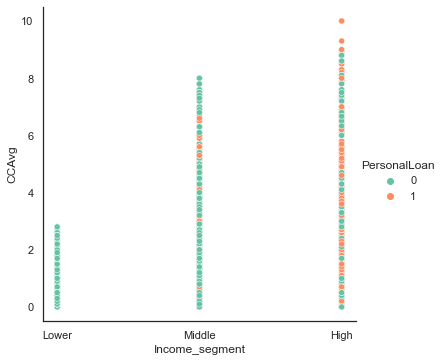

In [517]:
sns.relplot(x='Income_segment',y='CCAvg',hue='PersonalLoan',data=customers_data)

##### Multivariate Analysis | Income & Mortgage - across Target

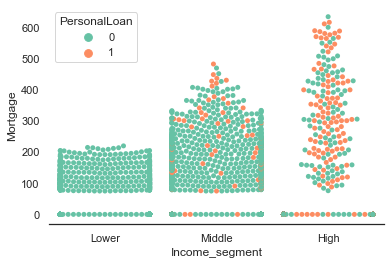

In [518]:
sns.swarmplot(x='Income_segment',y='Mortgage',hue='PersonalLoan',data=customers_data)
sns.despine(top=True,right=True,left=True) 

##### Multivariate Analysis |  Income & Education - across Target

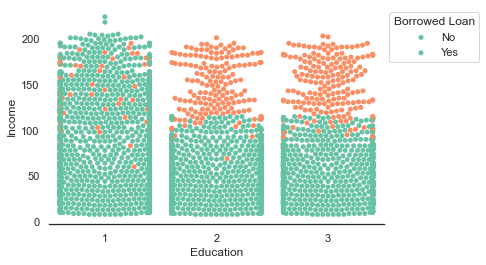

In [519]:
sns.swarmplot(x='Education',y='Income',hue='PersonalLoan',data=customers_data)
sns.despine(top=True,right=True,left=True) # to remove side line from graph
labels=["No","Yes"]
plt.legend(loc='lower left', frameon=False,)
plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))


##### Multivariate Analysis |  Income vs Agebins vs Education  - across Targets ( 0 & 1 )

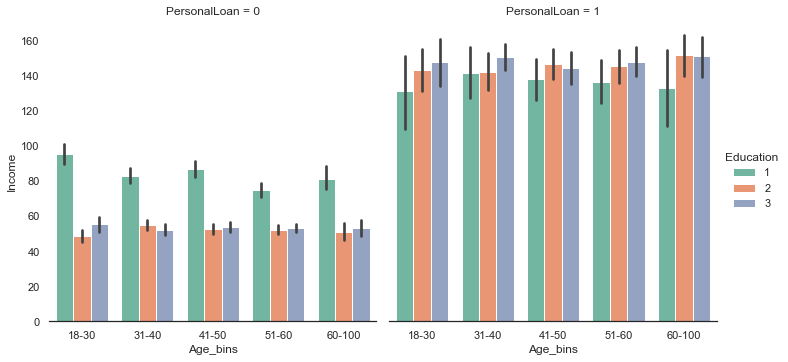

In [520]:
sns.catplot(y='Income',x='Age_bins',hue='Education',kind='bar',col="PersonalLoan", data=customers_data)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

##### Multivariate Analysis |  Education vs Average Spend  - across Targets ( 0 & 1 )

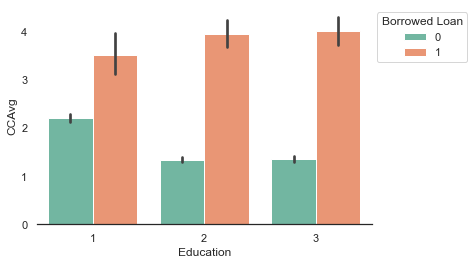

In [521]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.barplot(y='CCAvg',x='Education', hue='PersonalLoan',data=customers_data)
labels=["No","Yes"]
plt.legend(loc="upper left", title="Borrowed Loan",bbox_to_anchor=(1,1))
sns.despine(top=True,right=True,left=True) # to remove side line from graph

**Multivariate Analysis | Insights :**
   
- Higher Income is a majot factor in determining the loan borrowers.
    
- Higher Mortgages also drive loans to an extent. 
    
- Higher Average Spends are also linked to loan borrowers. 
   
- Income, Average Spends and Mortgage all seem to be correlated.

- Higher Education also drives Usage, Income, Mortages , and thus , loans. 



###  EDA | Checking Imbalance in Target Column <a id='id4f'></a>


([<matplotlib.patches.Wedge at 0x1c31e859df0>,
 [Text(-1.0503312798154913, 0.3268091226406516, ''),
  Text(1.0503312721659712, -0.3268091472254298, '')],
 [Text(-0.5729079708084497, 0.1782595214403554, '90.40%'),
  Text(0.5729079666359843, -0.1782595348502344, '9.60%')])

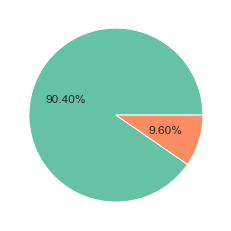

In [522]:
plt.pie(data=customers_data,x=customers_data["PersonalLoan"].value_counts(),autopct='%1.2f%%')

The data seems to be imbalanced with respect to Target feature, which is not a good insight. It might create a biased model , or  model that is accurate for 1 label and not for another. 

This can be handled via techniques like weight or SMOTE, which are out of scope of this course. But students are advised to explore on this. 

We will carry on without addressing this for now.

In [523]:
# Making a copy of data here before Feature Engineering section
customers_data_eda = customers_data.copy()


###  EDA | Insights Summary <a id='id3g'></a>



**Knowing Data:**

* Target column is Personal_loan (categorical datatype).
* We have following continuous features - Age, Experience, Income,mortage ,CCavg .
* No missing values in the data.

**Data Cleaning:**

* Experience had some -ve values which were treated by taking absolutes.
* Zipcodes were mapped o counties using Zipcode library. In order to reduce granularity, countie were further manually mapped to Regions using information from Internet.
* Age, Income & Spending were used to derive corresponding categories for better analysis. 

**EDA Insights :**

- Higher Income, Spend and Mortgages are indicator of loan borrowers customer segment. 
- Family size of 3 came out to be the best in terms of loan customers.
- Education level 2: Graduate and 3: Advanced/Professional  were also good indicators of our desired segment.
- Certificate of deposit is also a positive indicator for a loan borrower.
- Customers with other bank Credit card showed no corelation with loans.
- LosAngeles and Bay region contribute maximum towards loan borrowers.
- Below 30 and Above 60 are 2 most attrative age segments for loan customers.
- It can be inferred that the more income you have, the more you tend to spend and live a "larger than life" lifestyle.

**Tentative Profiling for Customer segmentation-**

 - Most Probable Borrowers : Customer with Higher income, Spending and Mortgages. Also, which have a Certificate of deposit. 
 - Likely Borrowers : Customers in medium income range, average spends and mortgages. 
 - Unlikely borrowers : Rest of the customers
  
   
**Next Steps for data pre-processing:**

* Since we already know the correlations , based on that at least Experience can be dropped as it was very highly correlated to Age
* We can also drop following logical duplicate features which we derived for EDA : Experience Country,Zipcode,Agebins,Income_segment & Spending_segment 

# <center>  Feature Engineering <font size=3 color="black" style="font-family:TimesNewRoman"> <a id='id5'></a>
    

###  Feature Engineering | Dropping Unnecessary or duplicate features <a id='id5a'></a>


In [524]:
# Checking the features available in our data before dropping
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Experience         4999 non-null   int64   
 2   Income             4999 non-null   int64   
 3   ZIPCode            4999 non-null   category
 4   Family             4999 non-null   category
 5   CCAvg              4999 non-null   float64 
 6   Education          4999 non-null   category
 7   Mortgage           4999 non-null   int64   
 8   PersonalLoan       4999 non-null   category
 9   SecuritiesAccount  4999 non-null   category
 10  CDAccount          4999 non-null   category
 11  Online             4999 non-null   category
 12  CreditCard         4999 non-null   category
 13  County             4999 non-null   category
 14  Age_bins           4999 non-null   category
 15  Income_segment     4999 non-null   category
 16  Spendi

In [525]:
# As per EDA, dropping columns which are either correlated with some feature or are duplicates
customers_data.drop(columns=["Age_bins", "ZIPCode","County",'Experience','Income_segment','Spending_segment'], inplace=True)

In [526]:
# Verifying once again if the features are sucessfully dropped
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Income             4999 non-null   int64   
 2   Family             4999 non-null   category
 3   CCAvg              4999 non-null   float64 
 4   Education          4999 non-null   category
 5   Mortgage           4999 non-null   int64   
 6   PersonalLoan       4999 non-null   category
 7   SecuritiesAccount  4999 non-null   category
 8   CDAccount          4999 non-null   category
 9   Online             4999 non-null   category
 10  CreditCard         4999 non-null   category
 11  Regions            4999 non-null   object  
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 398.5+ KB


###  Feature Engineering | Creating dummies <a id='id5b'></a>


4 of our categorical features are already in binary. SO we dont need to create dummies for those features namely  :

* SecuritiesAccount
* CDAccount
* Online 
* CreditCard         

So we'll have the same results with them even after creating dummies.

Thus we'll only create dummies for :
* Regions           
* Education             

In [527]:
# Dropping target to create Features set an Target set seperately as X & Y
X = customers_data.drop(['PersonalLoan'], axis=1)
Y = customers_data['PersonalLoan']

# Creating dummies out of X
dummie_features=['Regions','Education']
X=pd.get_dummies(X,columns=dummie_features,drop_first=True)

###  Feature Engineering | Train Test Split <a id='id5c'></a>


In [528]:
# Train tst split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1,stratify=Y)

###  Feature Engineering | Feature Scaling using Standardisation <a id='id5d'></a>


In [529]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

# <center>  Logistic Regression  <font size=3 color="black" style="font-family:TimesNewRoman"> <a id='id6'></a>
    

###  Choosing best Performance Metric <a id='id6a'></a>


As we have discussed before, there are multiple evaluation metrics which can be used in case of Classification. But which one should be given most importance?
This varies problem to problem, and for this probem let's look at how we can choose our best measurement metric.



####  There can be following errors our model can make - 
1. Type 1 Error : Model Predicts customer will opt for loan but he/she doesn't. (Loss of Resources)
2. Type 2 Error : Model Predicts customer will not opt for loan but he/she does. .(Opportunity loss)

#### Which of the above is more important ?
* The main objecive of this project is to acquire more customers, hence Type 2 error is of more significance here. It is okay if some of the marketing budget is spent incorrectly but we should not miss out on potential customers. 

* For this reason, Recall is the right metric to measure performance. Accuracy could also have been used, but since our data is imbalanced, it would not be a very prudent choice

#### Conclusion : Recall is the right Perfomance Metric choice


###  Defining Functions <a id='id6b'></a>


We will be training multiple models with varying parameters and features, thus it is better to define functions for common tasks such as model training, evaluation, confusion matrix upfront as below.
It adds cleaniness to the notebook an makes the code redundant. 

##### Defining funcion for Confusion Matrix 

In [530]:
def get_confusion_matrix(y_real,y_predicted,title):
    fig, ax = plt.subplots(1, 1)                                                 # Defining figure and axes object 
    
    c_matrix = confusion_matrix(y_real, y_predicted, labels=[0,1])               # getting data for confusin matrix
    display = ConfusionMatrixDisplay(confusion_matrix=c_matrix,
                               display_labels=["No","Yes"])                      # Displaying confusion matrix
    display.plot(cmap='Greens',colorbar=True,ax=ax)
    ax.set_title(title)                                                          # title for he chart
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()
   

##### Defining funcion for Metrics calculation and display

In [531]:
def fetch_metrics(classifier,X_train_data,X_test_data,y_train_df,y_test_df,statsklearn,threshold=0.5,flag=True,roc=False):
    '''
    This function calculates various metrics for a given model - Accuracy, Precision, Recall and F1 Score
    classifier: This is the model classifier 
    X_train_data, X_test_data: Features of test/train sets
    y_train_df,y_test_df: Target variable for train/test sets
    statsklearn : 1 if using an adjusted threshold, otherwise 0
    threshold: Adjusted or most optimized threshold value for classifying as 1
    flag: If True, then print all the metrics , default is True
    roc: If true, display ROC score. Default set to False
    '''
   
    
    scores_list=[]                                                   # Empty list to store train and test performance metrics
    if statsklearn==0:
        pred_train = classifier.predict(X_train_data)               # Predict Train data 
        pred_test = classifier.predict(X_test_data)                 # Predict Test data 
    else:
        pred_train = (classifier.predict(X_train_data)>threshold)   # Predict Train data using specified threshold
        pred_test = (classifier.predict(X_test_data)>threshold)     # Predict Train data using specified threshold
    
    
    pred_train = np.round(pred_train)                                                               
    pred_test = np.round(pred_test)
    
    # Calclating Accuracies
    train_acc = accuracy_score(y_train_df,pred_train)               # 
    test_acc = accuracy_score(y_test_df,pred_test)
    
    # Calclating Recall    
    train_recall = recall_score(y_train_df,pred_train)
    test_recall = recall_score(y_test_df,pred_test)
    
    # Calclating Precision       
    train_precision = precision_score(y_train_df,pred_train)
    test_precision = precision_score(y_test_df,pred_test)
    
    # Calclating F1 Score  
    train_f1 = f1_score(y_train_df,pred_train)
    test_f1 = f1_score(y_test_df,pred_test)
    
    # Add all the scores to our Scores list
    scores_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
      
    # Display all the Scores if Flag = True
    if flag == True: 
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",
              round(accuracy_score(y_train_df,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(accuracy_score(y_test_df,pred_test),3))
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m"
              ,round(recall_score(y_train_df,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
              round(recall_score(y_test_df,pred_test),3))
        
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m",
              round(precision_score(y_train_df,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(precision_score(y_test_df,pred_test),3))
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",
              round(f1_score(y_train_df,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(f1_score(y_test_df,pred_test),3))
        get_confusion_matrix(y_train_df,pred_train,"Confusion Matrix for Train")     
        get_confusion_matrix(y_test_df,pred_test,"Confusion Matrix for Test") 

    # Display ROC AUC if roc = True
    if roc == True:
        
        print("\x1b[0;30;47m \033[1mROC-AUC Score  :Train:\x1b[0m: ",
              round(roc_auc_score(y_train_df,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m: ",
              round(roc_auc_score(y_test_df,pred_test),3))
    
    # Return all the scores
    return scores_list 

##### Defining funcion for appending different Model merics scores to respective metrics lists

Since we will be training multiple models with varying parameters and features, thus we are defining this function here to keep track of all the scores together at one place. It will be easier to compare later. 

In [532]:
# Initialising empty lists to for train and test results of various models

accuracy_train = []
accuracy_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_score_train = []
f1_score_test = []

def append_metrics(metric):
     '''Adding metric scores to respective lists below so that all models can be compared later'''   
     accuracy_train.append(metric[0])
     accuracy_test.append(metric[1])
     recall_train.append(metric[2])
     recall_test.append(metric[3])
     precision_train.append(metric[4])
     precision_test.append(metric[5])
     f1_score_train.append(metric[6])
     f1_score_test.append(metric[7])

###  Model 1 - Logistic Regression with Sklearn library <a id='id6c'></a>


 MODEL PERFORMANCE
 Accuracy   : Train: 0.906  Test:  0.906
 Recall     : Train: 0.908  Test: 0.868
 Precision  : Train: 0.505  Test:  0.506
 F1         : Train: 0.649  Test: 0.639


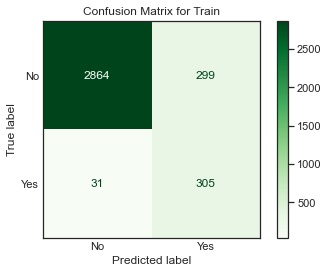

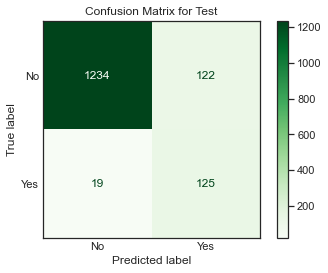

In [533]:
log_reg = LogisticRegression(class_weight='balanced')
model  = log_reg.fit(X_train_scaled_df,y_train)

sk_stat=0  # Set 0 for sklearn and 1 for statmodel

# Checking Model performances
scores_Sklearn = fetch_metrics(model,X_train_scaled_df,X_test_scaled_df,y_train,y_test,sk_stat)


##### Storing model scores to a common list for all models to be trained

In [534]:
append_metrics(scores_Sklearn)

**Revisiting Confusion Matrix again** 

_____________________________________________________________________________________


**True Positives Interpretation:**

Reality: The customer would opt for loan.

Model Prediction: The customer would opt for loan.

Interpretation: The model is accurate, and this part will bring money.
    
**True Negatives Interpretation:**

Reality: The customer would not opt for loan.

Model Prediction: The customer would not opt for loan.

Interpretation: The business is unaffected .

**False Positives Interpretation:**

Reality: The customer would not opt for loan.

Model Prediction: The customer would opt for loan.

Interpretation: Wastage of resources caused by model.

**False Negatives Interpretation:**

Reality: The customer would opt for loan.

Model Prediction: The customer would not opt for loan.

Interpretation: This is the worst that can happen. It's a clear loss of oppurtunity. The whole purpose of campaign was to acquire such customers. If team knew about this customers, they could have marketed some good schemes to them.

### Model 2 - Logistic Regression with Statmodel library <a id='id6d'></a>


Optimization terminated successfully.
         Current function value: 0.113898
         Iterations 9
 MODEL PERFORMANCE
 Accuracy   : Train: 0.962  Test:  0.953
 Recall     : Train: 0.688  Test: 0.653
 Precision  : Train: 0.888  Test:  0.817
 F1         : Train: 0.775  Test: 0.726


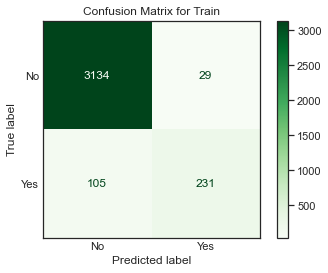

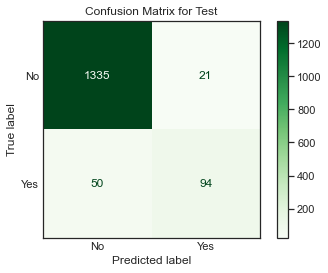

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           15
Date:                Sat, 30 Jul 2022   Pseudo R-squ.:                  0.6399
Time:                        00:43:07   Log-Likelihood:                -398.53
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                5.492e-293
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.2604      0.236    -22.276      0.000      -5.723      -4.798
Age                            0.1547      0.096      1.618      0.106      -0.033       0.342
Income                         3.0106      0.177     17.055      0.000       2.665       3.357
Family                         0.7829      0.108      7.278      0.000       0.572       0.994
CCAvg                          0.2176      0.094      2.310      0.021       0.033       0.402
Mortgage                       0.0874      0.073      1.206      0.228      -0.055       0.230
SecuritiesAccount             -0.2303      0.112     -2.056      0.040      -0.450      -0.011
CDAccount                      0.8431      0.100      8.459      0.000       0.648       1.038
Online                        -0.3423      0.099     -3.457      0.001      -0.536      -0.148
CreditCard                    -0.3662      0.116     -3.153      0.002      -0.594      -0.139
Regions_Central               -0.1968      0.111     -1.781      0.075      -0.413       0.020
Regions_Los Angeles Region    -0.0451      0.102     -0.444      0.657      -0.244       0.154
Regions_Southern              -0.0149      0.104     -0.143      0.886      -0.219       0.189
Regions_Superior              -0.3143      0.216     -1.456      0.145      -0.737       0.109
Education_2                    1.8569      0.150     12.375      0.000       1.563       2.151
Education_3                    1.9912      0.152     13.101      0.000       1.693       2.289
==============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [535]:
# Statsmodels by default fits a line passing through origin, it does not take into account the intercept
# Hence, in order to do that, we can add a constant 1 to our feature set using add_constant function

X_train_statmodel = sm.add_constant(X_train_scaled_df)
X_test_statmodel = sm.add_constant(X_test_scaled_df)


logit = sm.Logit( y_train, X_train_statmodel.astype(float) )
log_reg = logit.fit(warn_convergence=False)

sk_stat=1  # Set 0 for sklearn and 1 for statmodel

# Training our model and checking performances
scores_statmodel = fetch_metrics(lg,X_train_statmodel,X_test_statmodel,y_train,y_test,sk_stat)
append_metrics(scores_statmodel)
log_reg.summary() 


### Model 3 - Logistic Regression with Feature Selection ( P-Value based) <a id='id6e'></a>


In above stats models summary, we can observe that P-Values for all region based features are much larger than 0.05.

It essentially tells us that these features are insignificant for the model. Hence, let's drop these features and see the results.

In [536]:
X_train_new = X_train_stat.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)
X_test_new= X_test_stat.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)
logit_new = sm.Logit(y_train, X_train_new.astype(float))
log_reg = logit1.fit(warn_convergence =False)

log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.114762
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           11
Date:                Sat, 30 Jul 2022   Pseudo R-squ.:                  0.6371
Time:                        00:43:07   Log-Likelihood:                -401.55
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                7.885e-296
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1980      0.230    -22.607      0.000      -5.649      -4.747
Age                   0.1507      0.095      1.585      0.113      -0.036       0.337
Income                2.9923      0.174     17.158      0.000       2.650       3.334
Family                0.7735      0.107      7.240      0.000       0.564       0.983
CCAvg                 0.2112      0.093      2.266      0.023       0.028       0.394
Mortgage              0.0806      0.072      1.116      0.264      -0.061       0.222
SecuritiesAccount    -0.2293      0.113     -2.036      0.042      -0.450      -0.009
CDAccount             0.8396      0.099      8.469      0.000       0.645       1.034
Online               -0.3457      0.099     -3.505      0.000      -0.539      -0.152
CreditCard           -0.3831      0.116     -3.298      0.001      -0.611      -0.155
Education_2           1.8450      0.149     12.388      0.000       1.553       2.137
Education_3           1.9776      0.151     13.123      0.000       1.682       2.273
=====================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

##### Again, mortgage has high P Value , dropping it as well :

In [537]:
X_train_new = X_train_new.drop(['Mortgage'], axis = 1)
X_test_new = X_test_new.drop(['Mortgage'], axis = 1)
logit_new = sm.Logit(y_train, X_train_new.astype(float))
log_reg_2 = logit_new.fit()
log_reg_2.summary()

Optimization terminated successfully.
         Current function value: 0.114939
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           10
Date:                Sat, 30 Jul 2022   Pseudo R-squ.:                  0.6366
Time:                        00:43:07   Log-Likelihood:                -402.17
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                1.199e-296
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1941      0.230    -22.613      0.000      -5.644      -4.744
Age                   0.1492      0.095      1.572      0.116      -0.037       0.335
Income                3.0134      0.174     17.341      0.000       2.673       3.354
Family                0.7769      0.107      7.266      0.000       0.567       0.987
CCAvg                 0.1986      0.092      2.148      0.032       0.017       0.380
SecuritiesAccount    -0.2317      0.113     -2.059      0.040      -0.452      -0.011
CDAccount             0.8427      0.099      8.495      0.000       0.648       1.037
Online               -0.3437      0.098     -3.491      0.000      -0.537      -0.151
CreditCard           -0.3882      0.116     -3.348      0.001      -0.616      -0.161
Education_2           1.8369      0.148     12.371      0.000       1.546       2.128
Education_3           1.9659      0.150     13.110      0.000       1.672       2.260
=====================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

##### Dropping Age as P Value is much greater than 0.05

In [538]:
X_train_new = X_train_new.drop(['Age'], axis = 1)
X_test_new= X_test_new.drop(['Age'], axis = 1)
logit_new = sm.Logit(y_train, X_train_new.astype(float))
lr_model3 = logit_new.fit()
lr_model3.summary()

Optimization terminated successfully.
         Current function value: 0.115294
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                            9
Date:                Sat, 30 Jul 2022   Pseudo R-squ.:                  0.6355
Time:                        00:43:08   Log-Likelihood:                -403.41
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                3.200e-297
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1735      0.228    -22.704      0.000      -5.620      -4.727
Income                3.0026      0.173     17.369      0.000       2.664       3.341
Family                0.7691      0.107      7.196      0.000       0.560       0.979
CCAvg                 0.1792      0.092      1.948      0.051      -0.001       0.360
SecuritiesAccount    -0.2338      0.112     -2.080      0.037      -0.454      -0.014
CDAccount             0.8444      0.099      8.522      0.000       0.650       1.039
Online               -0.3354      0.098     -3.417      0.001      -0.528      -0.143
CreditCard           -0.3854      0.116     -3.322      0.001      -0.613      -0.158
Education_2           1.8329      0.148     12.361      0.000       1.542       2.123
Education_3           1.9513      0.149     13.106      0.000       1.659       2.243
=====================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

##### CCavg is also showing value close to and higher than 0.05. Since it is on boundary, and we already know from EDA that it is an important feature, let's keep it

Finally, let's check the model performance

 MODEL PERFORMANCE
 Accuracy   : Train: 0.959  Test:  0.956
 Recall     : Train: 0.682  Test: 0.674
 Precision  : Train: 0.864  Test:  0.836
 F1         : Train: 0.762  Test: 0.746


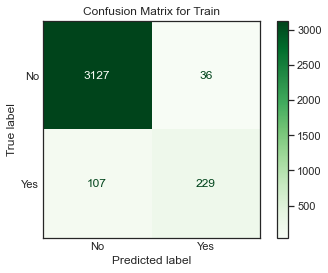

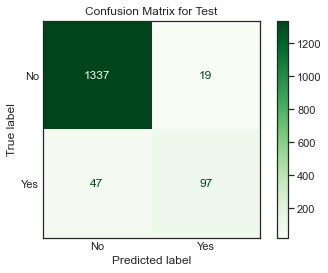

In [539]:
scores_statmodel = fetch_metrics(lr_model3,X_train_new,X_test_new,y_train,y_test,statmodel)
append_metrics(scores_statmodel)

### Model 4 - Logistic Regression with Optimized threshold value <a id='id6f'></a>


As per the ROC Curve, the optimal threshold value is where TPR ( True Positive Rate) is high and FPR ( False Positive Rate) is low

In Python, we can find this value as below :

In [540]:
fpr, tpr, thresholds = roc_curve(y_test, lr_model3.predict(X_test_new))  # Getting TPR, FPR and threshold data from ROC curve

optimal_index = np.argmax(tpr - fpr)                                    # Getting indices where tpr-fpr is maximmum
optimal_threshold_auc_roc = thresholds[optimal_index]                   # This is the optimal threshold value
"Optimal Threshold valus is   ----------"
print("Optimal Threshold valus is   -------->   "+str(optimal_threshold_auc_roc))     # Prining optimal threshold value

Optimal Threshold valus is   -------->   0.0915012656844663


Metrics after using this value as threshold :

 MODEL PERFORMANCE
 Accuracy   : Train: 0.899  Test:  0.897
 Recall     : Train: 0.902  Test: 0.875
 Precision  : Train: 0.487  Test:  0.481
 F1         : Train: 0.633  Test: 0.621


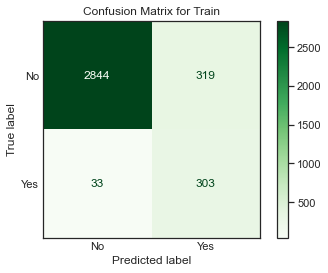

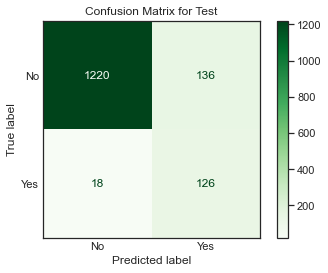

 ROC-AUC Score  :Train::  0.9  Test::  0.887


In [541]:
statmodel=1
scores_statmodel = fetch_metrics(lr_model3,X_train_new,X_test_new,y_train,y_test,statmodel,threshold=optimal_threshold_auc_roc,roc=True)
append_metrics(scores_statmodel)

**Observation:**

With  Threshold as `0.0915` the Recall has increased  from `67.4%` to `87.5%`.
This comes with a small drop in Accuracy, but as decided before, we are more interested in improving Recall as our objective. 

Thus, this model can be decided as the best model to use.

### Model Comparisons <a id='id5f'></a>


In [542]:
accuracy_train

[0.9056873392397828,
 0.9617033438125179,
 0.9591311803372392,
 0.8993998285224349]

In [543]:
comparison_frame = pd.DataFrame({'Model':['Model 1 : Logistic Regression with Sklearn',
                                          'Model 2 : Logistic Regression with Statsmodels',
                                          'Model 3 : Logistic Regression with Feature Selection ',
                                          'Model 4 : Logistic Regression with Optimal threshold Value',
                                          ],
                                          'Train_Accuracy':accuracy_train, 
                                          'Test_Accuracy':accuracy_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test,
                                          'Train F1':f1_score_train,
                                          'Test F1':f1_score_test
                                })                               

comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,Model 1 : Logistic Regression with Sklearn,0.90569,0.90600,0.90774,0.86806,0.50497,0.50607,0.64894,0.63939
1,Model 2 : Logistic Regression with Statsmodels,0.96170,0.95267,0.68750,0.65278,0.88846,0.81739,0.77517,0.72587
2,Model 3 : Logistic Regression with Feature Selection,0.95913,0.95600,0.68155,0.67361,0.86415,0.83621,0.76206,0.74615
3,Model 4 : Logistic Regression with Optimal threshold Value,0.89940,0.89733,0.90179,0.87500,0.48714,0.48092,0.63257,0.62069


**Result -**

Model 4 : Logistic Regression with Optimal threshold Value is the best model in terms of Recall. Hence this should be our model for prediction eventually. This improved Recall comes at the cost of a lower Accuracy but that is okay given our case.

### Further Analysis - ROC Curve & Coefficients Inerpretations <a id='id6g'></a>


##### ROC AUC Curves

ROC AUC curve for Train data :

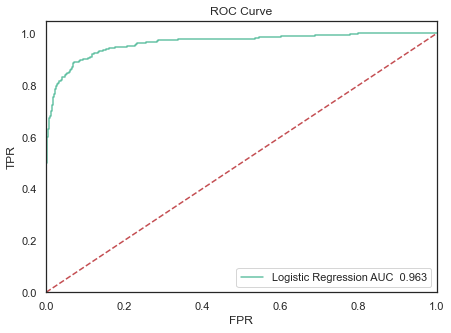

In [544]:
logit_roc_auc_train = roc_auc_score(y_train, lr_model3.predict(X_train_new))
fpr, tpr, thresholds = roc_curve(y_train, lr_model3.predict(X_train_new))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression AUC  %0.3f' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

ROC AUC curve for Test data :

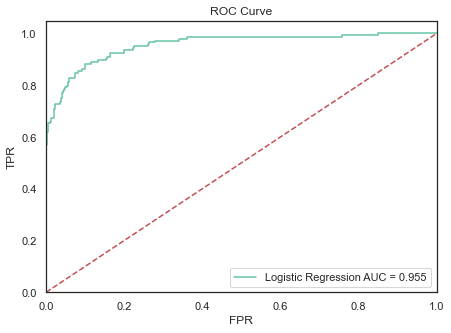

In [545]:
logit_roc_auc_test = roc_auc_score(y_test, lr_model3.predict(X_test_new))
fpr, tpr, thresholds = roc_curve(y_test, lr_model3.predict(X_test_new))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression AUC = %0.3f' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**Observations -**

* The performance is similar for Test and Train data, which is good
* ROC AUC of 0.96 on training and test is also good

##### Coefficients Analysis

In [546]:
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                            9
Date:                Sat, 30 Jul 2022   Pseudo R-squ.:                  0.6355
Time:                        00:43:10   Log-Likelihood:                -403.41
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                3.200e-297
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1735      0.228    -22.704      0.000      -5.620      -4.727
Income                3.0026      0.173     17.369      0.000       2.664       3.341
Family                0.7691      0.107      7.196      0.000       0.560       0.979
CCAvg                 0.1792      0.092      1.948      0.051      -0.001       0.360
SecuritiesAccount    -0.2338      0.112     -2.080      0.037      -0.454      -0.014
CDAccount             0.8444      0.099      8.522      0.000       0.650       1.039
Online               -0.3354      0.098     -3.417      0.001      -0.528      -0.143
CreditCard           -0.3854      0.116     -3.322      0.001      -0.613      -0.158
Education_2           1.8329      0.148     12.361      0.000       1.542       2.123
Education_3           1.9513      0.149     13.106      0.000       1.659       2.243
=====================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Interpretations :

**Features with +ve coefficients :  Income, Education, Family,CCavg,CD account,Age**

1 Unit  increase in these will  increase the probability of a person borrowing loan

**Features with -ve coefficients : Securities account,online ,Credit card**

1 Unit  increase in these will  decrease the probability of a person borrowing loan

##### Converting Coefficients to Odds

* As discussed in last session, the coefficients of the logistic regression model are in terms of log(odds).
* In order to find the odds,  we can take exponential of the coefficients. ---> **odds =  exp(b)**
* We can also calculate the probability from the odds ratio using this formula --> **probability = odds / (1+odds)**
* % change in odds with 1 unit of change in feauture can be calculated as ----> **odds = (exp(b) - 1) * 100**

Let's implement above in Python as below - 

In [547]:
# Below code snippet executes above listed formulas and creates a df to collate Odds ratio, probability 
# and p-value of coefficients

log_reg_coeff = pd.DataFrame(lr_model3.params, columns=['coef'])
log_reg_coeff.loc[:, "Odds Ratio"] = np.exp(log_reg_coeff.coef)
log_reg_coeff['Probability'] = log_reg_coeff['Odds Ratio']/(1+log_reg_coeff['Odds Ratio'])
log_reg_coeff['Percentage Change of Odds']=(np.exp(lr_model3.params)-1)*100
log_reg_coeff['pval']=lr_model3.pvalues
pd.options.display.float_format = '{:.2f}'.format
log_reg_coeff = log_reg_coeff.sort_values(by="Odds Ratio", ascending=False)
log_reg_coeff

,coef,Odds Ratio,Probability,Percentage Change of Odds,pval
Income,3.00,20.14,0.95,1913.74,0.00
Education_3,1.95,7.04,0.88,603.79,0.00
Education_2,1.83,6.25,0.86,525.17,0.00
CDAccount,0.84,2.33,0.70,132.66,0.00
Family,0.77,2.16,0.68,115.78,0.00
CCAvg,0.18,1.20,0.54,19.63,0.05
SecuritiesAccount,-0.23,0.79,0.44,-20.85,0.04
Online,-0.34,0.72,0.42,-28.50,0.00
CreditCard,-0.39,0.68,0.40,-31.98,0.00
const,-5.17,0.01,0.01,-99.43,0.00


**Observations-**

- Income: A 1 unit increase will increase the odds of a customer taking a personal loan by 20X ( Given all other features are kept constant)
- Family: A 1 unit increase will increase the odds of a customer taking a personal loan by 7X ( Given all other features are kept constant)
- CCAvg: A 1 unit increase will increase the odds of a customer taking a personal loan by 1.2X ( Given all other features are kept constant)


***Overall, we can conclude that most significant varaibles are Income,Education, CD account ,Family & CCAvg***

# <center>  Summary & Recommendations <font size=3 color="black" style="font-family:TimesNewRoman"> <a id='id7'></a>
    

- First we did an exhaustive EDA on our data to find important inights, and then developed 4 Logistic Regression models:
   * Model 1 : Using sklearn
   * Model 2 : Using statmodel
   * Model 3 : Improved Feature Selection in Model 2
   * Model 4 : Improved threshold in Mode 3
- The performance of all models was compared mainly on Recall. Model 4 can be treated as best model and can be used to make predictions.
- As per EDA & Regression model coefficents , the most important features for a loan borrower are Income,Education, CD account ,Family and CCAvg .
- Features with +ve coefficients :Income, Graduate and Advanced Education, Family,CCavg,CD account,Age
- Features with +ve coefficients :Securities account,online , credit card 
- Other important factors as per EDA for most likely borrowers are : Customers with graduate degree, customers having 3 family members 